#### Intro to Data Scince
## Homework 4

Due: Monday, May 25, 2020 11:59pm. 

In this assignment you will do data cleansing and exploratory data analysis for the Titanic dataset 

# 1. Basic EDA

In [1]:
# Your imports come here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1.1.** 
Write a code that generates an histogram presenting the fraction of survivors for the different classes of passengers/tickets. 

Text(0.5, 1.0, 'Fraction of survivors of each class')

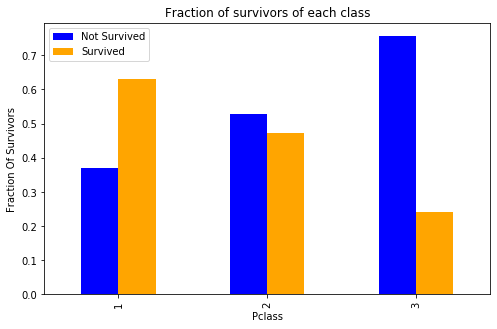

In [2]:
df_of_Survived = df.groupby(['Pclass']).Survived.value_counts(normalize=True).unstack()
df_of_Survived.plot( kind='bar', figsize=(8, 5),color=['b','orange']).legend(labels=['Not Survived','Survived'])
plt.ylabel('Fraction Of Survivors')
plt.xlabel('Pclass')
plt.title('Fraction of survivors of each class')

**Task 1.2.** Write a code that generates a scatterplot of Age vs. Fare for all passengers.

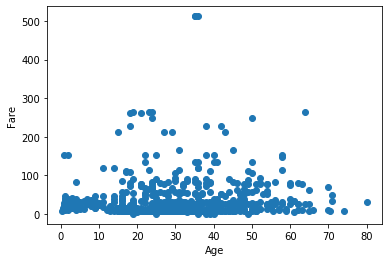

In [3]:
# Your code here
fig = plt.figure()
ax = plt.axes()
ax.scatter(df.Age, df.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

**Task 1.3.** Write a code that generates a scatterplot of Age vs. Fare for all passengers, separating the different classes with different colors of markers. If you can, try to choose non-default color (changing colors is not mandatory).     

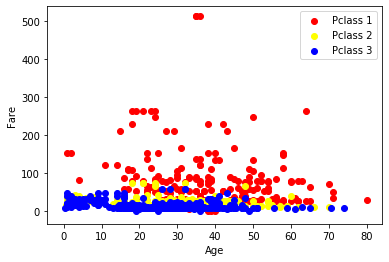

In [4]:
# Your code here
fig = plt.figure()
ax = plt.axes()
plt.xlabel('Age')
plt.ylabel('Fare')

ax.scatter(df.Age[df.Pclass==1], df.Fare[df.Pclass==1], c='red' ,)
ax.scatter(df.Age[df.Pclass==2], df.Fare[df.Pclass==2], c='yellow')
ax.scatter(df.Age[df.Pclass==3], df.Fare[df.Pclass==3], c='blue')
ax.legend(labels=['Pclass 1', 'Pclass 2','Pclass 3'])
plt.show()

# another option is to use sns.scatterplot(x = 'Age', y = 'Fare', hue ='Pclass', data=df);

**Task 1.4.** Write a code that generates a scatterplot of Age vs. Fare for all passengers, separating both the classes (using colors) and gender (using different symbols/markers).

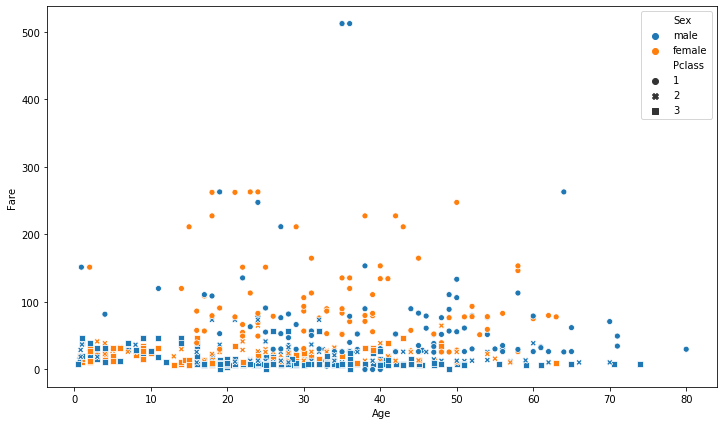

In [5]:
# Your code here
fig = plt.figure(figsize=(12, 7))
sns.scatterplot(x = 'Age', y = 'Fare', hue ="Sex" ,style="Pclass" , data=df);

**Task 1.5.** Write a code that generates two line plots on the same graph - one shows the average age for each class, and the other shows the average fare for each class. Classes are on the X axis. Use different line syles and colors, and include a legend. Try to set legend location in a manner that does not interfere with the other elements in the graph. 

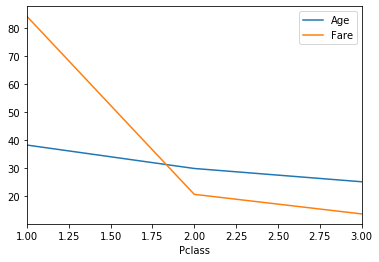

In [6]:
# Your code here
df.groupby(['Pclass']).mean()[['Age','Fare']].plot()

**Task 1.6.** Calculate the Pearson correlation coefficient for age and fare.  

In [7]:
# Your code here
df.loc[:, ['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


**Task 1.7.** Create an histogram of ages, another one of ages only for passengers that survived, and a last one for passengers that didn't survive.  Is there a visually noticable difference between the distibution of ages for survived vs. those that didn't survie?  

Text(0, 0.5, 'Number')

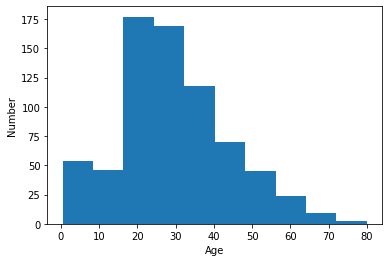

In [8]:
# Your code here
# Your code here
plt.hist(df.Age)
plt.xlabel("Age")
plt.ylabel("Number")



Text(0, 0.5, 'Number')

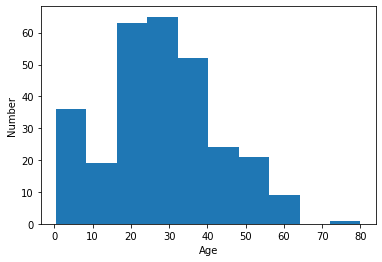

In [9]:
plt.hist(df.Age[df.Survived==1])
plt.xlabel("Age")
plt.ylabel("Number")

Text(0, 0.5, 'Number')

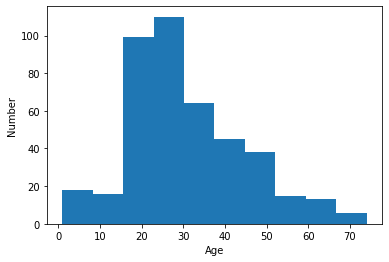

In [10]:
plt.hist(df.Age[df.Survived==0])
plt.xlabel("Age")
plt.ylabel("Number")

# Conclusion 
ניתן לראות שההבדל המשמעותי שרואים הוא שגילאים מתחת ל20 חלק גדול מהם ניצלו 

**Task 1.8.** (Bonus) Try to put the 3 previouse histograms as subplots of the same figure. 

Text(0, 0.5, 'Number')

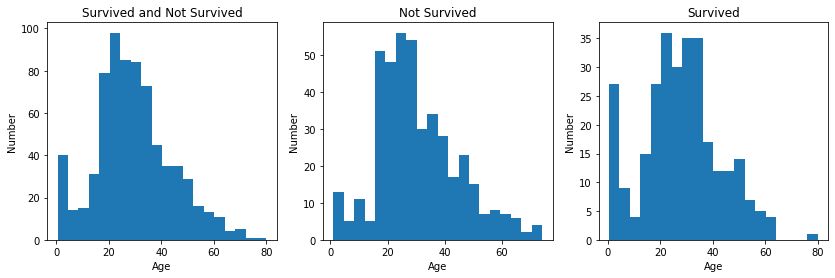

In [11]:
# Your code here
fig = plt.figure(figsize=(14, 4))

# create a subplot in a 1 by 3 grid, and return subplot specified in third parameter
fig1 = fig.add_subplot(1,3,1)
fig2 = fig.add_subplot(1,3,2)
fig3 = fig.add_subplot(1,3,3)

fig1.hist(df.Age,bins=20)
fig1.set_title('Survived and Not Survived')
fig1.set_xlabel('Age')
fig1.set_ylabel('Number')

fig2.hist(df.Age[df.Survived==0],bins=20)
fig2.set_title('Not Survived')
fig2.set_xlabel('Age')
fig2.set_ylabel('Number')

fig3.hist(df.Age[df.Survived==1],bins=20)
fig3.set_title('Survived')
fig3.set_xlabel('Age')
fig3.set_ylabel('Number')

# 2. Data cleansing - missing values


**Task 2.1.** Find the number of missing values for each one of the variables. Print out these values.


In [12]:
# Your code here
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Task 2.2.**  Examing those passengers for which 'embarked' has missing values. Print out these rows. What are the common charactaristics of these passengers?

In [13]:
# Your code here
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


They have the same ticket number,sex,Cabin,pclass and both survived but their age and name is different 

**Task 2.3.**  How would you suggest the handle the missing values of 'embarked'? Choose a method, and apply it.

In [14]:
# Your code here
df.Embarked.fillna("C",inplace=True)

first I saw must of B<num> cabins where located in embarked C so i filled the nans with C 

**Task 2.4.**

A. Delete the value for the fare of a random passenger. The generation of a random integer is unique to each student (or couple of students submitting together - see code below. The two digits number should be replaced with the last two digits of your own ID, or one of the students' IDs).

B. Now, find the single passenger for which the ‘fare’ value is missing. Take the median fare for passengers that belong to the same class and embarked on the same port, and use the median to fill in the missing value for this passenger.

In [15]:
# Your code here
#df.Fare.median()
from random import seed
from random import randint
# seed random number generator
seed(32) #replace with the last two digits of your ID
value = randint(0, 890)
print(value)
# Your code here

#setting the random passenger fare into nan
df.Fare.loc[value] = np.nan
df.loc[value]

79


PassengerId                          80
Survived                              1
Pclass                                3
Name           Dowdell, Miss. Elizabeth
Sex                              female
Age                                  30
SibSp                                 0
Parch                                 0
Ticket                           364516
Fare                                NaN
Cabin                               NaN
Embarked                              S
Name: 79, dtype: object

In [16]:

#get the embarked value from the missing Fare
em=df[df.Fare.isna()].Embarked.values[0]
#getting the Pclass value from the missing Fare
pc=df[df.Fare.isna()].Pclass.values[0]

df.Fare[df.Fare.isna()] = df[(df.Pclass == pc)&(df.Embarked==em)].Fare.median()
df.loc[value]

PassengerId                          80
Survived                              1
Pclass                                3
Name           Dowdell, Miss. Elizabeth
Sex                              female
Age                                  30
SibSp                                 0
Parch                                 0
Ticket                           364516
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 79, dtype: object

**Task 2.5.**  Fill in the missing valies for the age variable, using the median.

In [17]:
# Your code here
df.Age.fillna(df.Age.median(),inplace=True)

# 3. Data cleansing - outliers


**Task 3.1.** Examine outliers in the age variable, using boxplot. What method does this visualization implement? How many outliers do you think there are?

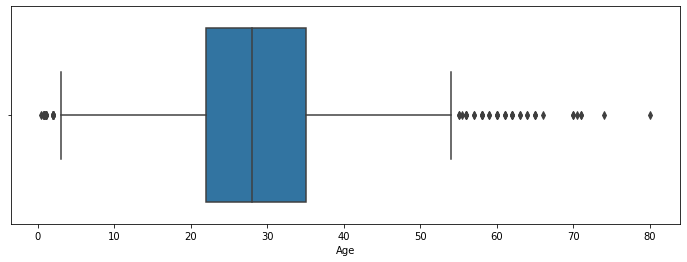

In [18]:
# Your code here
fig = plt.figure(figsize=(12,4))
sns.boxplot(df.Age)


# Answer

As we can see there a quite large number of outliers , this method helping us to find those outliers values the center is the median to his left is the 25% on his right is 75%, It can also tell us if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

In [19]:
#---------------------------------------------------------------------------------------------------------------------

**Task 3.2.** Examine outliers in the age variable using another method of your choice. Turn the detected outliers to NaN. 

Text(0, 0.5, 'Amount')

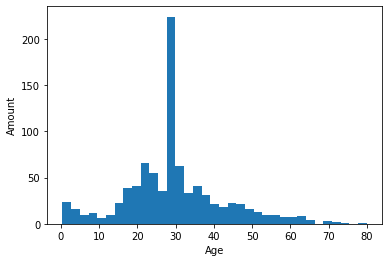

In [20]:
plt.hist(df.Age,bins=35)
plt.xlabel("Age")
plt.ylabel("Amount")


In [21]:
df.Age[df.Age>=54] = np.nan
df.Age[df.Age<3] = np.nan

**Task 3.3.** Fill in the new missing values of age, using a method of your choice. 

In [22]:
# Your code here
df.Age.fillna(df.Age.mean(),inplace=True)


we chose to fill the outliers with mean .